In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.datasets import load_wine
wine =load_wine()
S =wine.data
t =wine.target

In [26]:
from sklearn.model_selection import train_test_split
S_train,S_test,t_train,t_test =train_test_split(S,t,test_size=0.3,random_state=42)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA =LinearDiscriminantAnalysis()
LDA.fit(S_train,t_train)

LinearDiscriminantAnalysis()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
t_pred_LDA =LDA.predict(S_test)
accuracy_LDA =accuracy_score(t_test,t_pred_LDA)
precision_LDA =precision_score(t_test,t_pred_LDA,average='weighted')
recall_LDA =recall_score(t_test,t_pred_LDA,average='weighted')
confusion_matrix_LDA =confusion_matrix(t_test,t_pred_LDA)

print("LDA Model Performance Analysis:")
print("Accuracy value is:", accuracy_LDA)
print("Precision value is:", precision_LDA)
print("Recall value is:", recall_LDA)
print("Confusion Matrix computed is:\n", confusion_matrix_LDA)
print("\nClassification Report is as follows:\n", classification_report(t_test,t_pred_LDA))

LDA Model Performance Analysis:
Accuracy value is: 1.0
Precision value is: 1.0
Recall value is: 1.0
Confusion Matrix computed is:
 [[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]

Classification Report is as follows:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



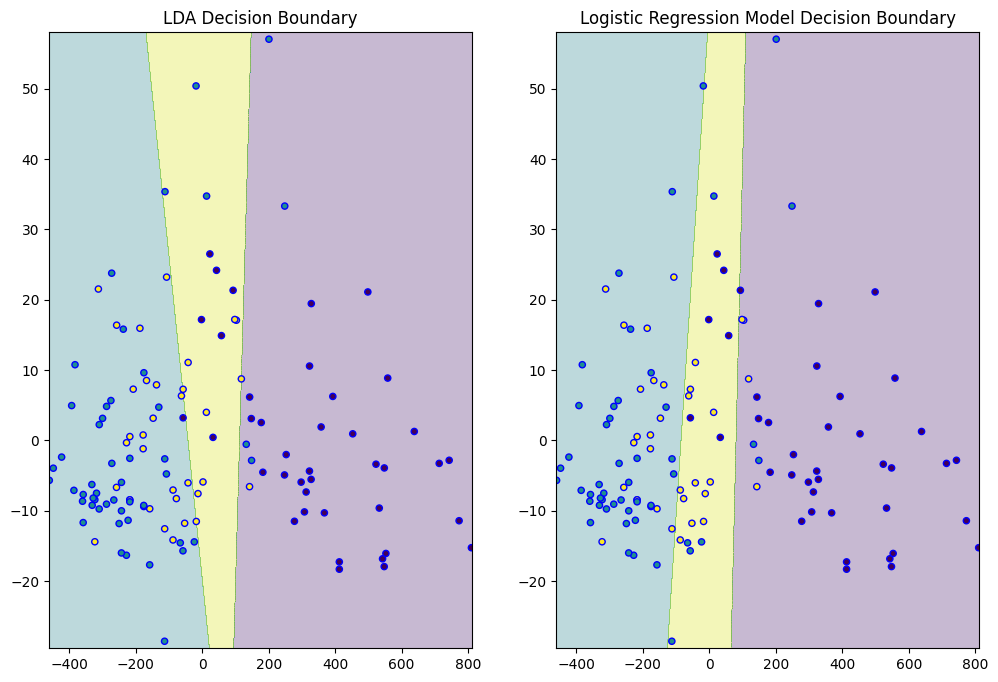

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LogisticRegression
pca =PCA(n_components=2)
S_train_2D =pca.fit_transform(S_train)
S_test_2D =pca.transform(S_test)

lda_2D =LinearDiscriminantAnalysis()
lda_2D.fit(S_train_2D,t_train)
log_reg_2D =LogisticRegression(max_iter=2000)
log_reg_2D.fit(S_train_2D,t_train)

def plot_decision_boundaries(model,S,t,title):
    x_min,x_max =S[:,0].min()-1,S[:,0].max()+1
    y_min,y_max=S[:,1].min()-1,S[:,1].max()+1
    xx,yy =np.meshgrid(np.arange(x_min,x_max,0.1),
                         np.arange(y_min,y_max,0.1))

    Z =model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z =Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(S[:,0],S[:,1],c=t,edgecolor='blue',s=20)
    plt.title(title)
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plot_decision_boundaries(lda_2D,S_train_2D,t_train,"LDA Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_boundaries(log_reg_2D,S_train_2D,t_train,"Logistic Regression Model Decision Boundary")
plt.show()